# Spotify-2023 Exploratory Data Analysis
## Name: Deirojel Martin M. Garcia
## Section: 2ECE-A

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [268]:
main = pd.read_csv('spotify-2023.csv', encoding='latin-1')
main


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [49]:
rows, columns = main.shape
print("Number of Rows:", rows)
print("Number of Columns:", columns)

Number of Rows: 953
Number of Columns: 24


In [38]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    object 
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   8

In [379]:
main['streams'] = pd.to_numeric(main['streams'], errors='coerce')

In [55]:
streams_mean= main['streams'].mean()
streams_median= main['streams'].median()
streams_std=main['streams'].std()

print("Mean of values in the column streams:", streams_mean)
print("Median of values in the column streams:", streams_median)
print("Standard deviation of values in the column streams:", streams_std)

Mean of values in the column streams: 514137424.93907565
Median of values in the column streams: 290530915.0
Standard deviation of values in the column streams: 566856949.0388832


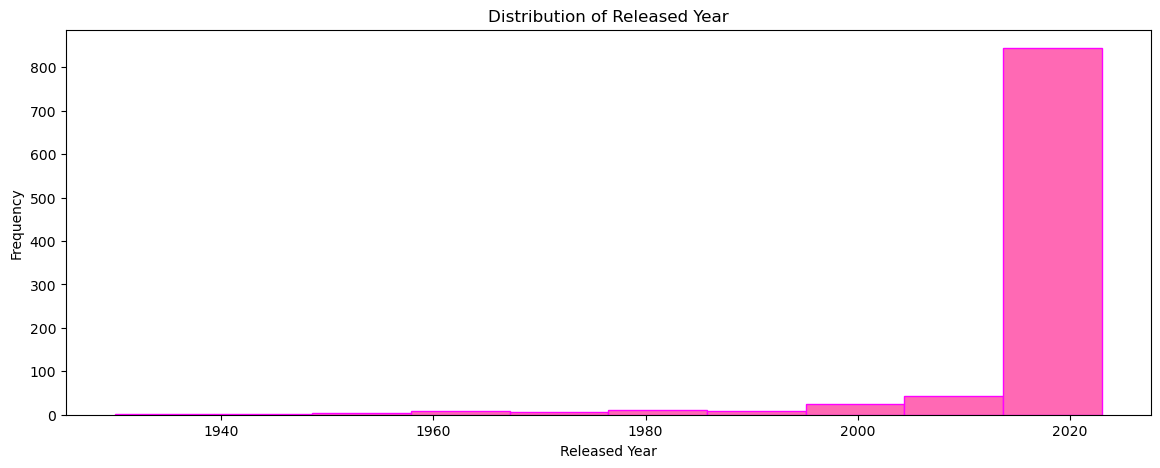

In [376]:
plt.figure(figsize=(14, 5))
main['released_year'].plot.hist(color='hotpink', edgecolor='magenta')
plt.title("Distribution of Released Year")
plt.xlabel("Released Year")
plt.ylabel("Frequency")
plt.show()

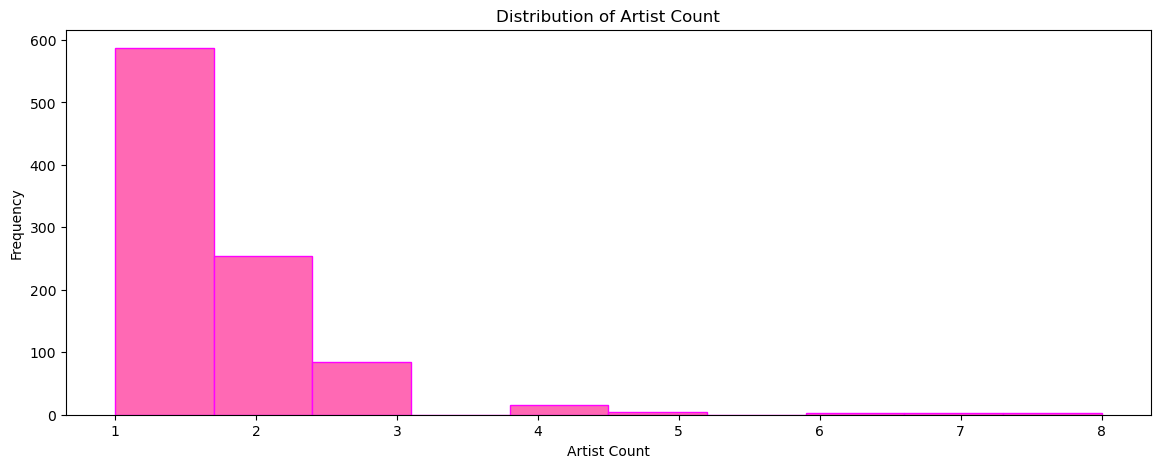

In [381]:
plt.figure(figsize=(14, 5))
main['artist_count'].plot.hist(color='hotpink', edgecolor='magenta')
plt.title("Distribution of Artist Count")
plt.xlabel("Artist Count")
plt.ylabel("Frequency")
plt.show()

In [83]:
top_stream = main.nlargest(1,'streams')[['track_name', 'artist(s)_name', 'streams']]
top_stream

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.703895e+09


In [75]:
top5_streams = main.nlargest(5,'streams')[['track_name', 'artist(s)_name', 'streams']]
top5_streams

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
620,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09


In [85]:
top5_most_artist = main['artist(s)_name'].value_counts().nlargest(5).reset_index()
top5_most_artist

,artist(s)_name,count
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17


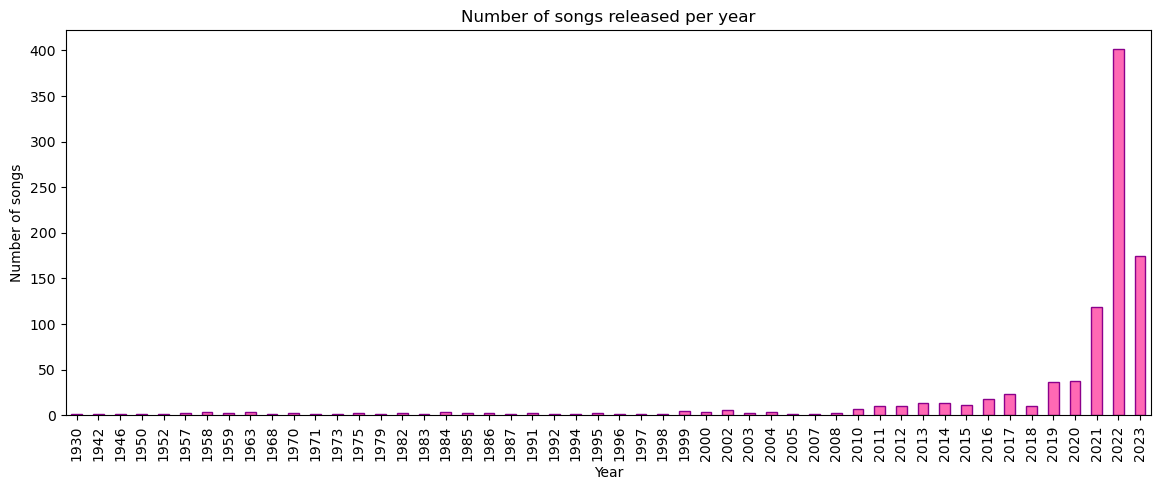

In [145]:
plt.figure(figsize=(14, 5))
main['released_year'].value_counts().sort_index().plot(kind='bar', color='hotpink', edgecolor='darkmagenta')
plt.title('Number of songs released per year')
plt.xlabel('Year')
plt.ylabel('Number of songs')
plt.show()

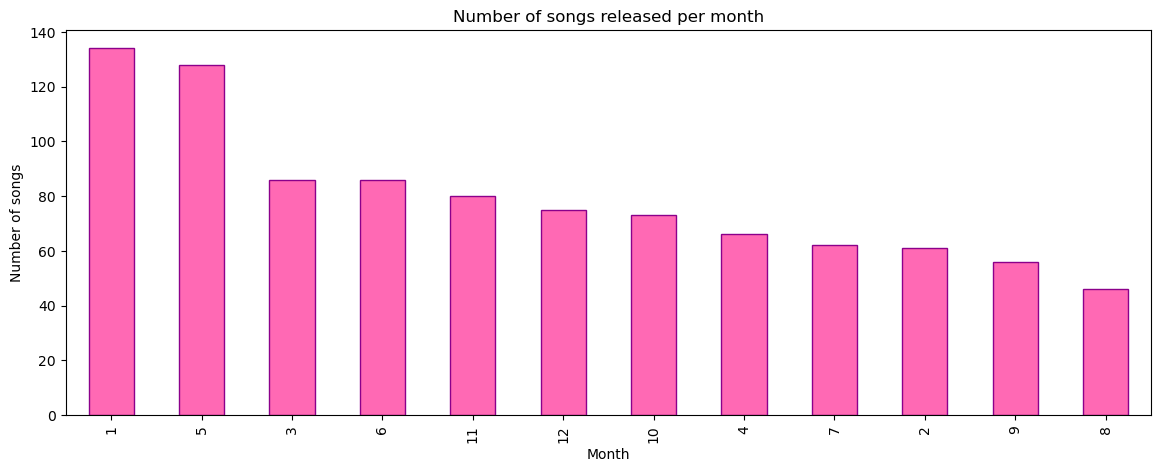

In [387]:
plt.figure(figsize=(14, 5))
main['released_month'].value_counts().sort_values(ascending=False).plot(kind='bar', color='hotpink', edgecolor='darkmagenta')
plt.title('Number of songs released per month')
plt.xlabel('Number of the Month')
plt.ylabel('Number of songs')
plt.show()

In [391]:
correl = main[['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%']].corr()
correl

,streams,bpm,danceability_%,energy_%,valence_%,acousticness_%
streams,1.000000,-0.002438,-0.105457,-0.026051,-0.040831,-0.004485
bpm,-0.002438,1.000000,-0.147095,0.025794,0.041195,-0.017694
danceability_%,-0.105457,-0.147095,1.000000,0.198095,0.408451,-0.236165
energy_%,-0.026051,0.025794,0.198095,1.000000,0.357612,-0.577344
valence_%,-0.040831,0.041195,0.408451,0.357612,1.000000,-0.081907
acousticness_%,-0.004485,-0.017694,-0.236165,-0.577344,-0.081907,1.000000


([<matplotlib.axis.YTick at 0x1c261f1b590>,
 [Text(0, 0, 'streams'),
  Text(0, 1, 'bpm'),
  Text(0, 2, 'danceability_%'),
  Text(0, 3, 'energy_%'),
  Text(0, 4, 'valence_%'),
  Text(0, 5, 'acousticness_%')])

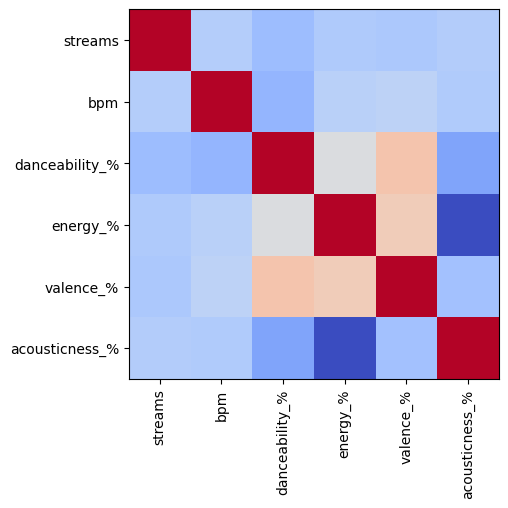

In [310]:
plt.imshow(correl, cmap='coolwarm')
plt.xticks(range(len(correl.columns)),correl.columns, rotation=90) 
plt.yticks(range(len(correl.columns)), correl.columns) 

In [180]:
correl_dance_energy = correl.loc['danceability_%', 'energy_%']
print("The correlation of danceablity and energy:", correl_dance_energy)


The correlation of danceablity and energy: 0.1980948483762567


In [178]:
correl_valence_acousticness = correl.loc['valence_%', 'acousticness_%']
print("The correlation of valence and acousticness:", correl_valence_acousticness)

The correlation of valence and acousticness: -0.08190727483082776


{'Spotify playlist': 4955719, 'Deezer playlist': 95913.0, 'Apple playlist': 64625}


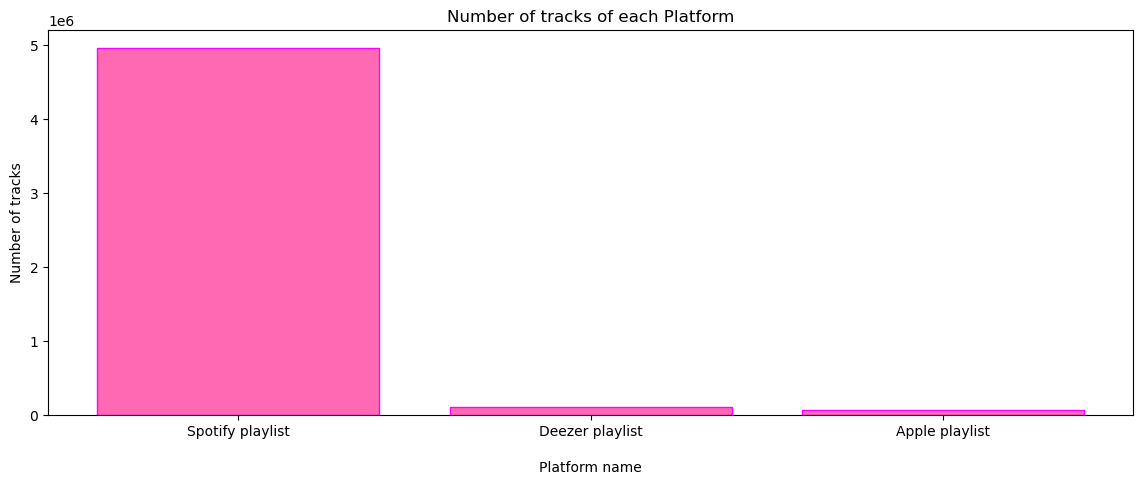

In [393]:
main['in_deezer_playlists'] = pd.to_numeric(main['in_deezer_playlists'], errors='coerce')
platform_count = { 'Spotify playlist': main['in_spotify_playlists'].sum(), 
                   'Deezer playlist': main['in_deezer_playlists'].sum(),
                   'Apple playlist': main['in_apple_playlists'].sum()}
print(platform_count)

platform_count = pd.DataFrame(platform_count.items(), columns = ['platform', 'Number of tracks'])

plt.figure(figsize=(14, 5))
plt.bar(platform_count['platform'], platform_count['Number of tracks'], color='hotpink', edgecolor='magenta')
plt.title('Number of tracks of each Platform')
plt.ylabel('Number of tracks')
plt.xlabel('\nPlatform name')
plt.show()

Text(0.5, 0, '\nKey')

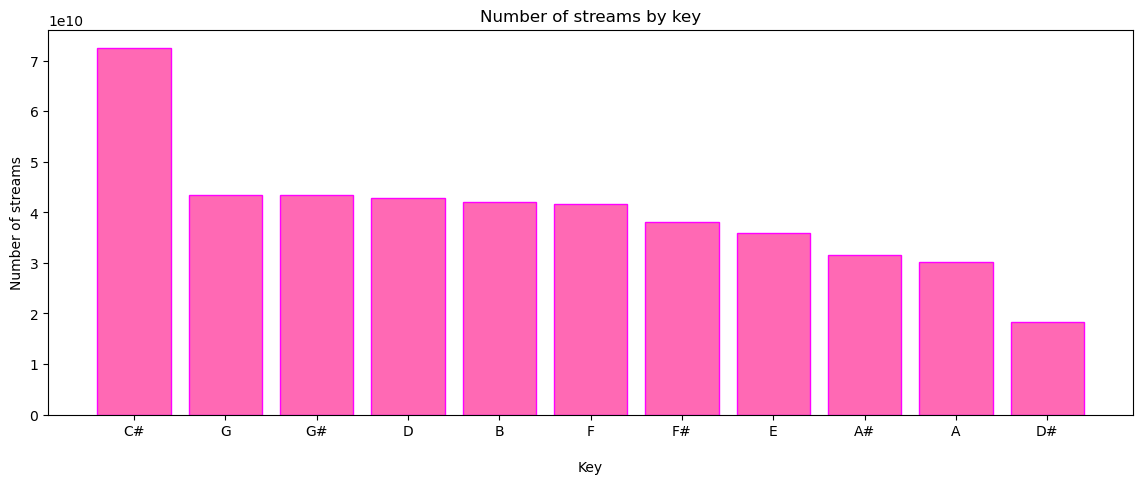

In [397]:
strms_by_key = main.groupby('key')['streams'].sum().sort_values(ascending=False).reset_index()
strms_by_key.columns = ['Key', 'Average Streams']
plt.figure(figsize=(14, 5))
plt.bar(strms_by_key['Key'], strms_by_key['Average Streams'], color='hotpink', edgecolor='magenta')
plt.title('Number of streams by key')
plt.ylabel('Number of streams')
plt.xlabel('\nKey')

Text(0.5, 0, '\nKey')

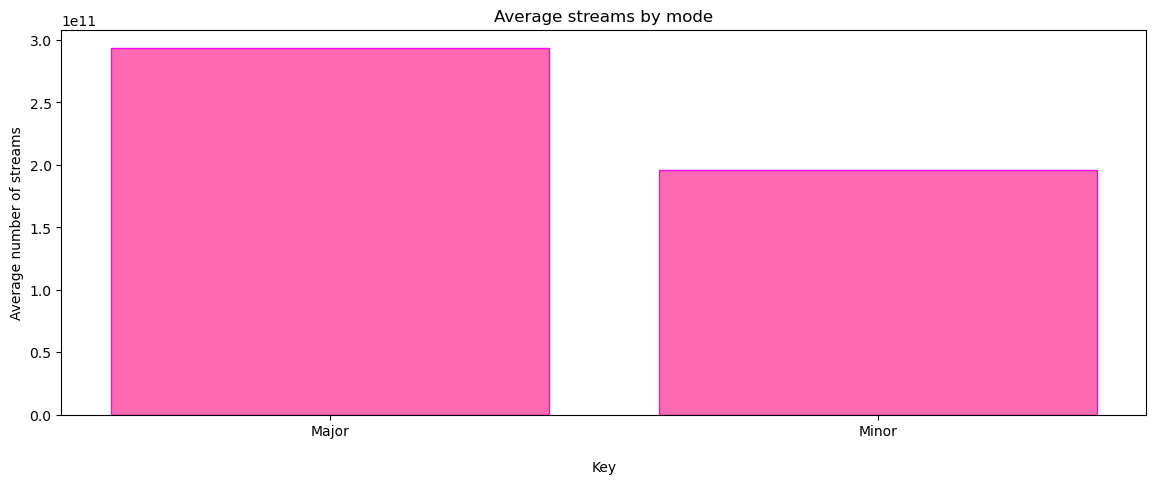

In [399]:
strms_by_mode = main.groupby('mode')['streams'].sum().reset_index()
strms_by_mode.columns = ['Mode', 'Average Streams']
plt.figure(figsize=(14, 5))
plt.bar(strms_by_mode['Mode'], strms_by_mode['Average Streams'], color='hotpink', edgecolor='magenta')
plt.title('Streams by mode')
plt.ylabel('Number of streams')
plt.xlabel('\nMode')

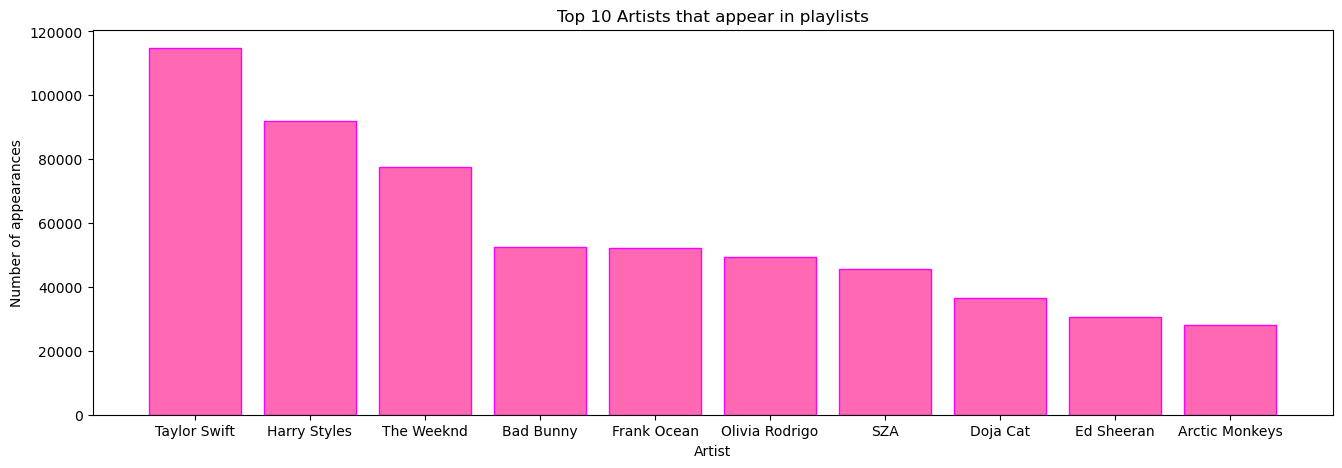

In [411]:
main['total_playlist'] = main['in_spotify_playlists'] + main['in_apple_playlists'] + main['in_deezer_playlists']
main['total_chart'] = main['in_spotify_charts'] + main['in_apple_charts'] + main['in_deezer_charts']
artist_analysis = main.groupby('artist(s)_name')[['total_playlist', 'total_chart']].sum().reset_index()
artist_analysis = artist_analysis.sort_values(by=['total_playlist', 'total_chart'], ascending=False)
top10_artists = artist_analysis.head(10)
plt.figure(figsize=(16, 5))
plt.bar(top10_artists['artist(s)_name'], top10_artists['total_playlist'], label='Playlist Appearances', color='hotpink',edgecolor='magenta')
plt.title('Top 10 Artists that appear in playlists')
plt.ylabel('Number of appearances')
plt.xlabel('Artist')
plt.show()

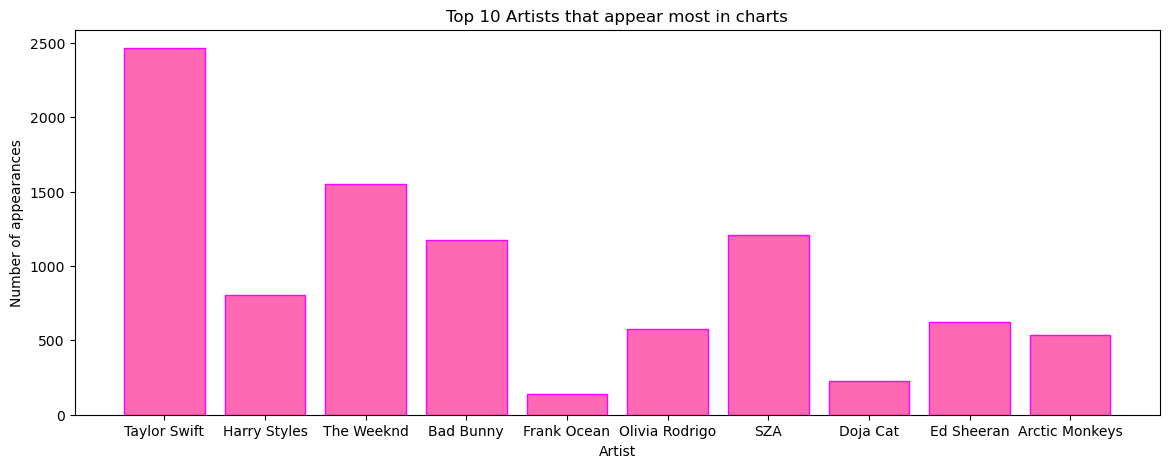

In [409]:
plt.figure(figsize=(14, 5))
plt.bar(top10_artists['artist(s)_name'], top10_artists['total_chart'], label='Chart Appearances',color='hotpink',edgecolor='magenta')
plt.title('Top 10 Artists that appear most in charts')
plt.ylabel('Number of appearances')
plt.xlabel('Artist')
plt.show()